In [1]:
#This is the new version of old Figure 4 and new Figure 4 and 5
#The plot showed the consistency scale values for different detection algorithms
#This code adds a opaqcity filter for each corresponding algorithm to highlight regions with high AR freq
#Mean AR freq calculated from the code titled 'Calculate_Mean_AR_freq'
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches

In [2]:
# Reading the datasets with consistency scale values for each algorithm and IVT
#Can only be generated after running NCS1.py,NCS2.py
CB = np.load('CBcsv.npy')
CN = np.load('CNcsv.npy')
GW = np.load('GWcsv.npy')
Reid = np.load('RDcsv.npy')
MD = np.load('MDcsv.npy')
IVT = np.load('IVTcsv.npy')
#Mean_AR=xr.open_dataset('Mean_AR.nc').ar_binary_tag 
#AR_freq=Mean_AR.values
#normalized_AR_freq= (AR_freq/50)
#print(normalized_AR_freq.max())
algorithms = np.stack([GW, MD, Reid, CB, CN, IVT], axis=0)
print(algorithms.shape)
names = ["(a) Guan and Waliser", "(b) Mundhenk", "(c) Reid et al.",
         "(d) TECA-BARD v1.0.1", "(e) ClimateNet", "(f) IVT"]

(6, 361, 576)


In [3]:
#Readinf Mean AR Freq 

# Load mean AR frequency datasets for each algorithm
file_names = ['Mean_AR_GW.nc', 'Mean_AR_MD.nc', 'Mean_AR_RD.nc', 'Mean_AR_CB.nc', 'Mean_AR_CN.nc']

mean_ar_frequencies = []

for file in file_names:
    dataset = xr.open_dataset(file)
    ar_freq=dataset.ar_binary_tag.values
    mean_ar_frequencies.append(ar_freq / ar_freq.max() )  # Normalizing

# Convert list to a NumPy array (shape: 6, height, width)
mean_ar_frequencies = np.stack(mean_ar_frequencies, axis=0)

Mean_AR_IVT=xr.open_dataset('Mean_AR_IVT.nc').IVT
IVT_freq=Mean_AR_IVT.values
normalized_IVT_freq= (IVT_freq/IVT_freq.max())
#print(normalized_IVT_freq.min())

# Stack IVT data on top of mean_ar_frequencies
mean_ar_frequencies = np.vstack([mean_ar_frequencies, np.expand_dims(normalized_IVT_freq, axis=0)])
print(mean_ar_frequencies[0].min())
# Print max value to check normalization
print(mean_ar_frequencies.shape)

0.0
(6, 361, 576)


0
(361,)
1
(361,)
2
(361,)
3
(361,)
4
(361,)
5
(361,)


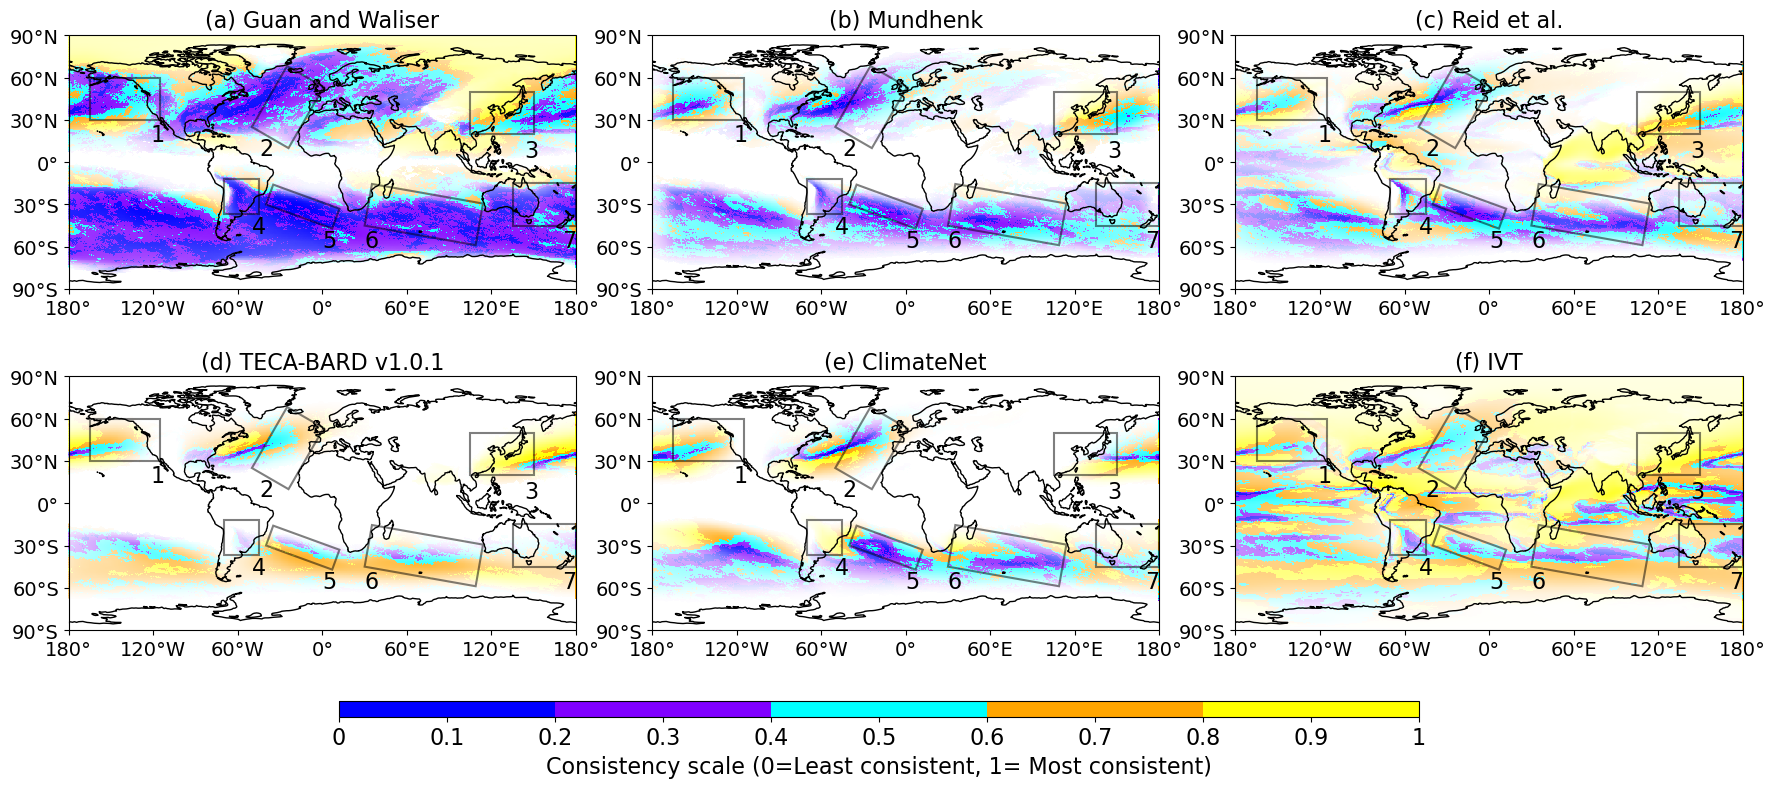

In [12]:
#6 color bar plots
from matplotlib.colors import BoundaryNorm, ListedColormap
lat=np.load('lat.npy')
lon=np.load('lon.npy')

bounds = np.arange(0, 1.1, 0.2)  # For example, from 0 to 1 with 0.1 intervals
n_colors = len(bounds) - 1  # Number of discrete colors
data=algorithms[1]
#print(normalized_AR_freq.values)
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(18,8),constrained_layout=False)
# Define the five color-blind friendly colors with RGBA values (R, G, B, A)
colors = [
    (0, 0, 1, 1),    # Blue
    (0.5, 0, 1, 1),   # Purple
    (0, 1, 1, 1),      # Cyan
    (1, 0.647, 0, 1),  # Orange
    (1, 1, 0, 1)    # Yellow
]

# Create a ListedColormap from these colors
cmap = ListedColormap(colors)
# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
for i in range(0,6):

        data=algorithms[i]
        normalized_freq=mean_ar_frequencies[i]
        print(i)
        print(lat.shape)
        
       
        # Use pcolormesh for large data
        cs = axs[i].pcolormesh(lon, lat, data, 
                                transform=ccrs.PlateCarree(),
                                cmap=cmap ,
                                shading='auto')

         # Apply 2D alpha transparency
        cs.set_alpha(normalized_freq)
        
        # Title each subplot with the name of the model
        axs[i].set_title(names[i],fontsize=16)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        # Increase font size of tick labels
        axs[i].tick_params(axis='x', labelsize=14) 

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        # Increase font size of tick labels
        axs[i].tick_params(axis='y', labelsize=14) 
        
        #Adding patches
        axs[i].add_patch(mpatches.Rectangle(xy=[-165, 30], width=50, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    #label='1',
                                    transform=ccrs.PlateCarree())
                 )
                 #-100,45
        axs[i].annotate("1",(-122,15),color='black',fontsize=16)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-50, 25], width=30, height=50,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='Black',
                                    angle=-30,
                                    transform=ccrs.PlateCarree())
                 )
                 #-25,55
        axs[i].annotate("2",(-45,5),color='black',fontsize=16)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[105, 20], width=45, height=30,  # Shifted right, slightly reduced width
                                alpha=0.5,
                                lw=1.5,  
                                facecolor='None',
                                edgecolor='black',  
                                angle=0,  
                                transform=ccrs.PlateCarree())
                )
        axs[i].annotate("3",(143,3.5),color='black',fontsize=16)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-70, -37], width=25, height=25,
        #xy=[-85, -63], width=30, height=50
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree())
                 )
                 #-80,-61
        axs[i].annotate("4",(-50,-50),color='black',fontsize=16)
        #-96,-61     
        axs[i].add_patch(mpatches.Rectangle(xy=[30, -45], width=80, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    angle=-10,
                                    transform=ccrs.PlateCarree())
                 )
                 #35,-40
        axs[i].annotate("6",(30,-60),color='black',fontsize=16)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-40, -30], width=50, height=15,
        #xy=[140, -45], width=30, height=30
                                    alpha=0.5,
                                    lw=1.5,
                                    angle=-20,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree())
                 )
                 #157,-42
        axs[i].annotate("5",(0,-60),color='black',fontsize=16)

        axs[i].add_patch(mpatches.Rectangle(xy=[135, -45], width=45, height=30,
                                alpha=0.5,
                                lw=1.5,  # Reduce thickness to 1
                                angle=0,  # Remove rotation
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )

        axs[i].annotate("7", (170, -60), color='black', fontsize=16)  # Shift annotation to the right



#fig.delaxes(axs[5])

fig.subplots_adjust(bottom=0.10, top=1.0, left=0.05, right=0.98,
                    wspace=0.15, hspace=-0.1)
#fig.subplots_adjust(bottom=1, top=0.9, left=0.1, right=0.80,
                    #wspace=0.15, hspace=0)

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cbar_ax = fig.add_axes([0.2, 0.07, 0.6, 0.02])

# Draw the colorbar
bounds=[0,0.2,0.4,0.6,0.8,1]
norms = BoundaryNorm(bounds, len(bounds) - 1)
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',boundaries = bounds,norm=norms, shrink=1, pad =0.05) 
cbar.set_label('Consistency scale (0=Least consistent, 1= Most consistent)', fontsize=16)
cbar_ticks = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
#cbar_tick_labels = ['Highly inconsistent(0-0.2)', 'Inconsistent(0.2-0.4)', 'Moderately Consistent(0.4-0.6)', 'Consistent(0.6-0.8)', 'Highly Consistent(0.8-1)']
#cbar_ticks = [0, 0.2, 0.4, 0.6, 0.8]
#cbar_tick_labels = ['Highly inconsistent(0-0.2)', 'Inconsistent(0.2-0.4)',
#                    'Moderately Consistent(0.4-0.6)', 'Consistent(0.6-0.8)', 'Highly Consistent(0.8-1)']
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks, fontsize=16)
#plt.tight_layout()
plt.savefig("Figure4.png", dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
#Creating table for the boxed regions for csv and dominant season for each algorithm 
#Additional imports
import numpy as np
import shapely.geometry as sg
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
lat=np.load('lat.npy')
lon=np.load('lon.npy')

# Initialize lists to store data
patch_numbers = []
algorithm_names = []
avg_values = []

def rotate_point(x, y, xc, yc, angle):
    """ Rotate a point (x, y) around a center (xc, yc) by 'angle' degrees. """
    angle_rad = np.radians(angle)
    cos_theta, sin_theta = np.cos(angle_rad), np.sin(angle_rad)
    
    x_new = cos_theta * (x - xc) - sin_theta * (y - yc) + xc
    y_new = sin_theta * (x - xc) + cos_theta * (y - yc) + yc
    
    return x_new, y_new

def get_patch_corners(x, y, width, height, angle=0):
    """ Get the four corner points of a possibly rotated rectangle. """
    xc, yc = x + width / 2, y + height / 2  # Center of the rectangle
    
    # Original (non-rotated) corners
    corners = [
        (x, y),  # Bottom-left
        (x + width, y),  # Bottom-right
        (x + width, y + height),  # Top-right
        (x, y + height)  # Top-left
    ]
    
    if angle != 0:  # Rotate corners if angle is specified
        corners = [rotate_point(px, py, xc, yc, angle) for px, py in corners]

    return corners

def calculate_patch_average(data, lon, lat, patch_corners):
    """
    Calculate the average data values within a rotated or non-rotated patch.
    
    Parameters:
        data (2D numpy array): Data values on a lat-lon grid.
        lon (1D numpy array): Longitude values matching the columns of data.
        lat (1D numpy array): Latitude values matching the rows of data.
        patch_corners (list of tuples): [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
                                        The four corner points of the patch.
    Returns:
        float: Average value of the data within the patch.
    """
    polygon = sg.Polygon(patch_corners)

    # Create a 2D meshgrid of lon and lat
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    values_inside = []
    for i in range(data.shape[0]):  # Loop over latitude indices
        for j in range(data.shape[1]):  # Loop over longitude indices
            point = sg.Point(lon_grid[i, j], lat_grid[i, j])
            if polygon.contains(point):
                values_inside.append(data[i, j])

    return np.nanmean(values_inside) if values_inside else np.nan

# Define patches
patches = [
    {"xy": [-165, 30], "width": 50, "height": 30, "angle": 0},  # Patch 1
    {"xy": [-50, 25], "width": 30, "height": 50, "angle": -30},  # Patch 2
    {"xy": [105, 20], "width": 45, "height": 30, "angle": 0},  # Patch 3
    {"xy": [-70, -37], "width": 25, "height": 25, "angle": 0},  # Patch 4
    {"xy": [30, -45], "width": 80, "height": 30, "angle": -10},  # Patch 6
    {"xy": [-40, -30], "width": 50, "height": 15, "angle": -20},  # Patch 5
    {"xy": [135, -45], "width": 45, "height": 30, "angle": 0},  # Patch 7
]

# Example data setup (Assume you have these)
# lat, lon = np.meshgrid(np.linspace(-90, 90, 180), np.linspace(-180, 180, 360))
# data = np.random.rand(180, 360)  # Example random data

# Compute patch averages
for i, patch in enumerate(patches, 1):
    patch_corners = get_patch_corners(*patch["xy"], patch["width"], patch["height"], patch["angle"])

    for j, (data, name) in enumerate(zip(algorithms, names), 1):  # Match data with corresponding algorithm name
        avg_value = calculate_patch_average(data, lon, lat, patch_corners)
        #print(f"Patch {i}, Algorithm {name} average value: {avg_value:.4f}")

         # Append values to the lists
        patch_numbers.append(i)
        algorithm_names.append(name)
        avg_values.append(avg_value)

# Create a pandas DataFrame
df = pd.DataFrame({
    'Patch Number': patch_numbers,
    'Algorithm Name': algorithm_names,
    'Average Value': avg_values
})


In [ ]:
# Print the table in a manuscript-friendly format
# Sort the DataFrame by Algorithm Name
df_sorted = df.sort_values(by=['Algorithm Name', 'Patch Number'])

# Print the sorted table
print(df_sorted.to_string(index=False))
print(df.to_string(index=False))